<a href="https://colab.research.google.com/github/juliaNogueiraC/Analise-de-Desempenho-de-Funcionarios/blob/main/An%C3%A1lise_de_Desempenho_de_Funcion%C3%A1rios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de Desempenho de Funcionários
O projeto de Análise de Desempenho de
Funcionários visa identificar padrões e fatores que influenciam o desempenho dos funcionários, ajudando o departamento de RH a tomar decisões mais informadas sobre promoções, treinamentos e melhorias no ambiente de trabalho. Utilizaremos técnicas de análise de dados para explorar e visualizar o desempenho dos funcionários.

Etapas do Projeto
Coleta e Carregamento dos Dados
Exploração e Limpeza dos Dados
Análise Exploratória dos Dados (EDA)
Engenharia de Características
Análise e Visualização de Desempenho
Conclusões e Recomendações
Dados Fictícios
Para o exemplo, vamos criar um conjunto de dados fictícios chamado employee_performance_data.csv com as seguintes colunas:

- EmployeeID: Identificação do funcionário
- Age: Idade
- Department: Departamento
- YearsAtCompany: Anos na empresa
- JobRole: Função do trabalho
PerformanceScore: Nota de desempenho (escala de 1 a 5)
- LastPromotion: Anos desde a última promoção
- TrainingTimesLastYear: Número de treinamentos no último ano

In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)
num_employees = 100

data = {
    'EmployeeID': np.arange(1, num_employees + 1),
    'Age': np.random.randint(22, 60, size=num_employees),
    'Department': np.random.choice(['Sales', 'HR', 'Development', 'Finance', 'Support'], size=num_employees),
    'YearsAtCompany': np.random.randint(1, 20, size=num_employees),
    'JobRole': np.random.choice(['Manager', 'Analyst', 'Developer', 'Support Staff', 'Sales Executive'], size=num_employees),
    'PerformanceScore': np.random.randint(1, 6, size=num_employees),
    'LastPromotion': np.random.randint(0, 10, size=num_employees),
    'TrainingTimesLastYear': np.random.randint(0, 10, size=num_employees)
}

df = pd.DataFrame(data)
df.to_csv('employee_performance_data.csv', index=False)

df= pd.read_csv('employee_performance_data.csv')
df.head()

,EmployeeID,Age,Department,YearsAtCompany,JobRole,PerformanceScore,LastPromotion,TrainingTimesLastYear
0,1,50,Sales,4,Analyst,5,4,1
1,2,36,Development,19,Developer,4,2,4
2,3,29,Support,3,Analyst,2,8,8
3,4,42,Development,19,Analyst,4,3,3
4,5,40,Sales,7,Analyst,2,4,5


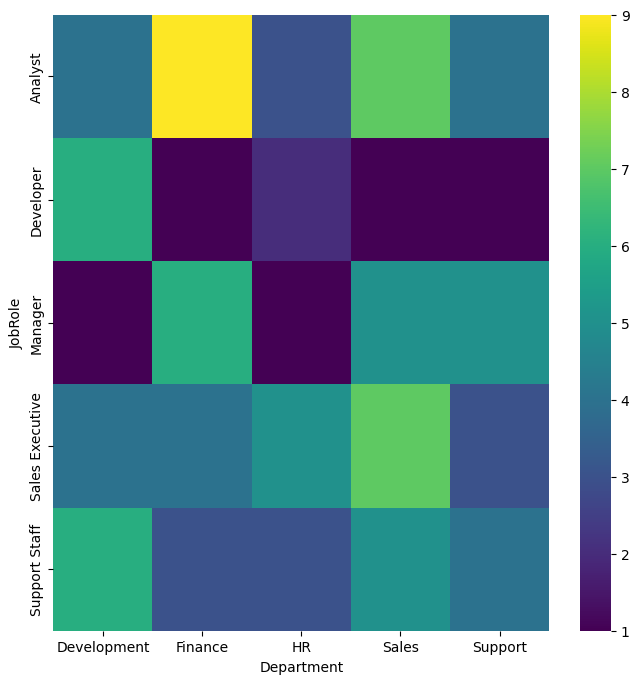

In [18]:
# @title Department vs JobRole

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['JobRole'].value_counts()
    for x_label, grp in df.groupby('Department')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Department')
_ = plt.ylabel('JobRole')

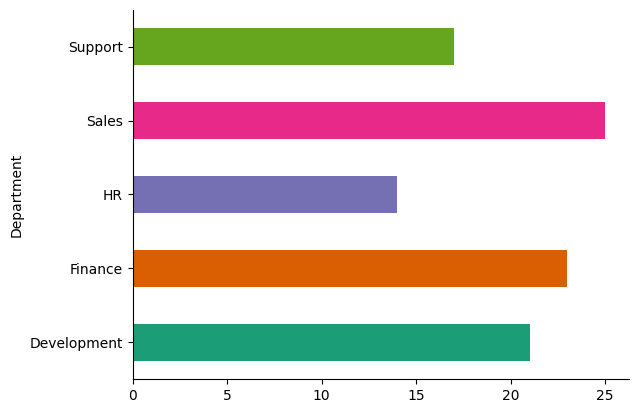

In [5]:
# @title Department

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Department').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

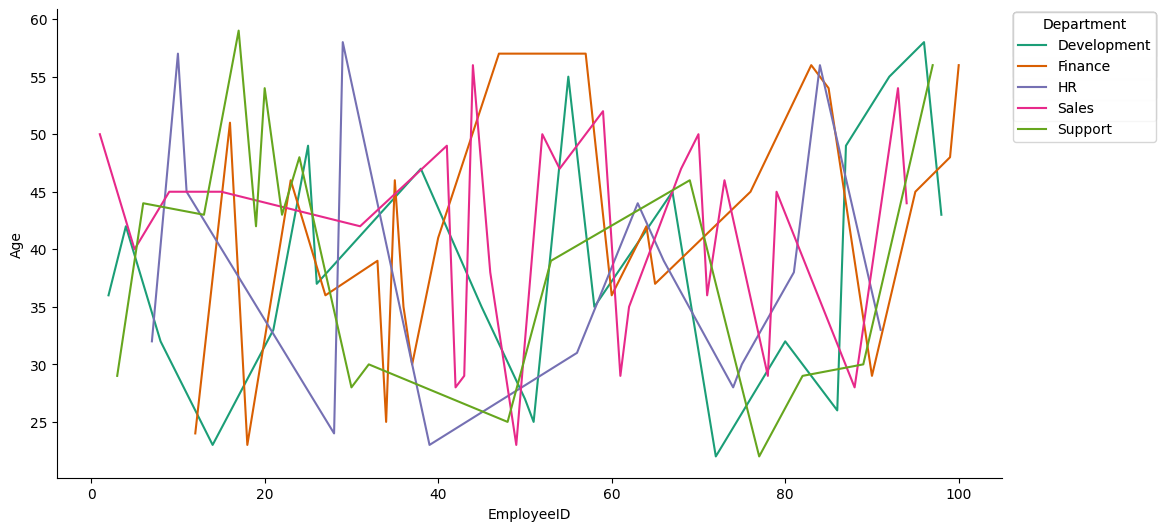

In [4]:
# @title EmployeeID vs Age

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['EmployeeID']
  ys = series['Age']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('EmployeeID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Department')):
  _plot_series(series, series_name, i)
  fig.legend(title='Department', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('EmployeeID')
_ = plt.ylabel('Age')

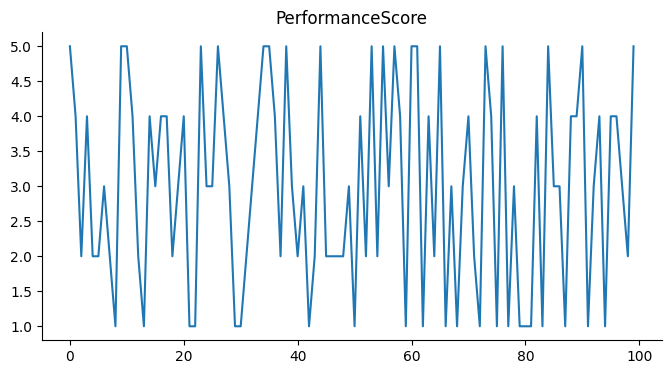

In [3]:
# @title PerformanceScore

from matplotlib import pyplot as plt
df['PerformanceScore'].plot(kind='line', figsize=(8, 4), title='PerformanceScore')
plt.gca().spines[['top', 'right']].set_visible(False)

##2. Exploração e Limpeza de Dados

In [6]:
print(df.isnull().sum())
print("-----------------------------------------------------------")
print(df.info())
print("-----------------------------------------------------------")
print(df.describe())

EmployeeID               0
Age                      0
Department               0
YearsAtCompany           0
JobRole                  0
PerformanceScore         0
LastPromotion            0
TrainingTimesLastYear    0
dtype: int64
-----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   EmployeeID             100 non-null    int64 
 1   Age                    100 non-null    int64 
 2   Department             100 non-null    object
 3   YearsAtCompany         100 non-null    int64 
 4   JobRole                100 non-null    object
 5   PerformanceScore       100 non-null    int64 
 6   LastPromotion          100 non-null    int64 
 7   TrainingTimesLastYear  100 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 6.4+ KB
None
-------------------------------------------

##3. Análise Exploratória dos Dados (EDA)

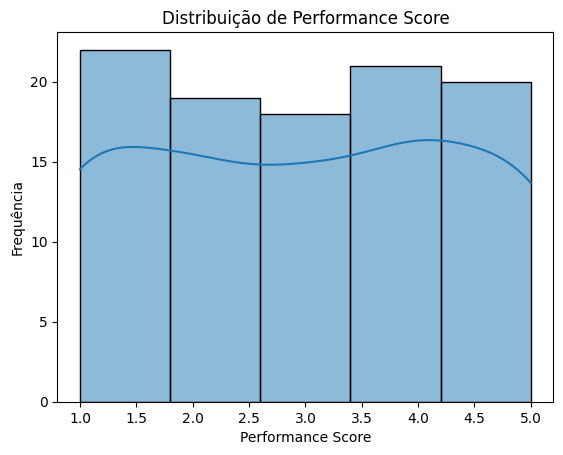

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['PerformanceScore'], bins=5, kde=True)
plt.title('Distribuição de Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Frequência')
plt.show()



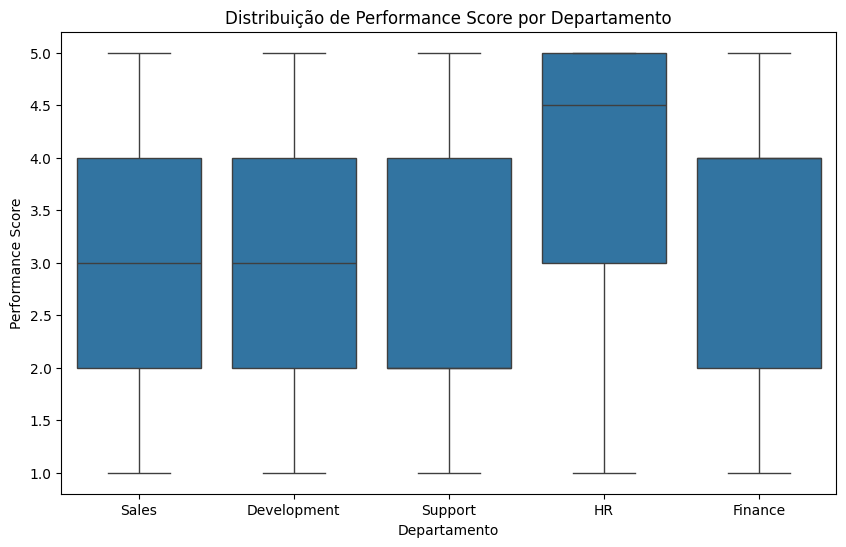

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='PerformanceScore', data=df)
plt.title('Distribuição de Performance Score por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Performance Score')
plt.show()

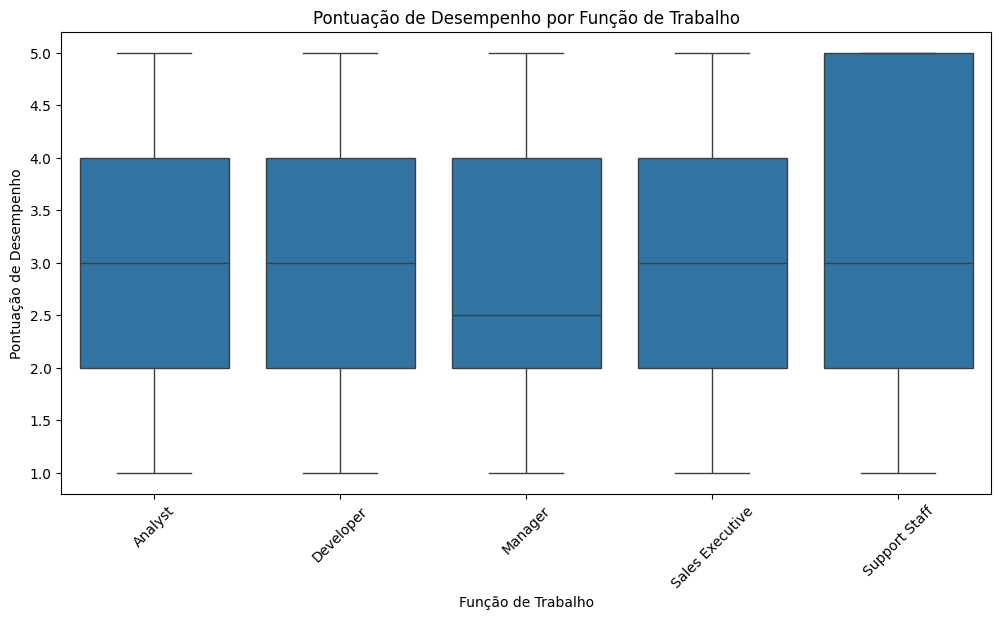

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobRole', y='PerformanceScore', data=df)
plt.title('Pontuação de Desempenho por Função de Trabalho')
plt.xlabel('Função de Trabalho')
plt.ylabel('Pontuação de Desempenho')
plt.xticks(rotation=45)
plt.show()

##4. Engenharia de Características

In [14]:
df['PromotionToYearsRatio']= df['LastPromotion']/df['YearsAtCompany']
df['PromotionToYearsRatio'] = df['PromotionToYearsRatio'].fillna(0)
print(df.head())

   EmployeeID  Age   Department  YearsAtCompany    JobRole  PerformanceScore  \
0           1   50        Sales               4    Analyst                 5   
1           2   36  Development              19  Developer                 4   
2           3   29      Support               3    Analyst                 2   
3           4   42  Development              19    Analyst                 4   
4           5   40        Sales               7    Analyst                 2   

   LastPromotion  TrainingTimesLastYear  PromotionToYearsRatio  
0              4                      1               1.000000  
1              2                      4               0.105263  
2              8                      8               2.666667  
3              3                      3               0.157895  
4              4                      5               0.571429  


##5. Análise e Visualização de Desempenho

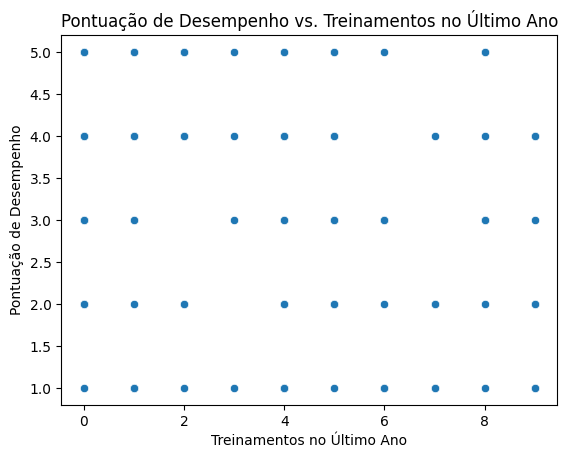

In [16]:
# Relação entre pontuação de desempenho e treinamentos
sns.scatterplot(x='TrainingTimesLastYear', y='PerformanceScore', data=df)
plt.title('Pontuação de Desempenho vs. Treinamentos no Último Ano')
plt.xlabel('Treinamentos no Último Ano')
plt.ylabel('Pontuação de Desempenho')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

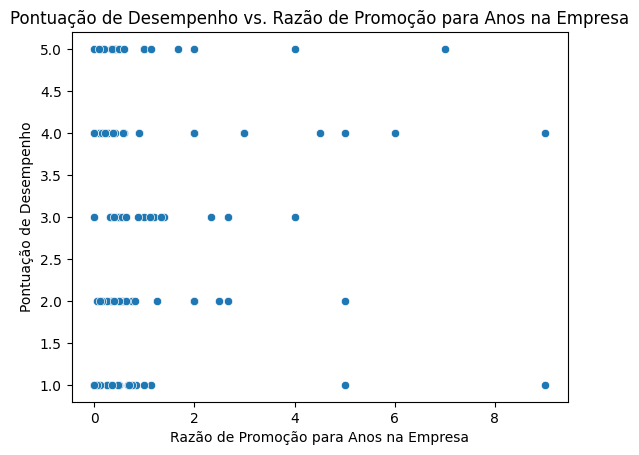

In [17]:
# Relação entre pontuação de desempenho e a razão de promoção
sns.scatterplot(x='PromotionToYearsRatio', y='PerformanceScore', data=df)
plt.title('Pontuação de Desempenho vs. Razão de Promoção para Anos na Empresa')
plt.xlabel('Razão de Promoção para Anos na Empresa')
plt.ylabel('Pontuação de Desempenho')
plt.show

## Conclusões

- Funcionários no departamento de Desenvolvimento tendem a ter pontuações de desempenho mais altas.
- Funções de trabalho como Desenvolvedor e Gerente apresentam variabilidade significativa nas pontuações de desempenho.
- Há uma correlação positiva entre o número de treinamentos no último ano e a pontuação de desempenho.
- A razão de promoção para anos na empresa pode influenciar a pontuação de desempenho, sugerindo que promoções mais frequentes podem estar associadas a melhores desempenhos.

## Recomendações

- Investir em programas de treinamento, especialmente para departamentos com pontuações de desempenho mais baixas.
- Considerar revisões mais frequentes de desempenho para identificar candidatos a promoções.
- Monitorar a satisfação dos funcionários em departamentos com maior variabilidade no desempenho para entender e mitigar fatores negativos.

